【回顾&引言】前面一章的内容大家可以感觉到我们主要是对基础知识做一个梳理，让大家了解数据分析的一些操作，主要做了数据的各个角度的观察。那么在这里，我们主要是做数据分析的流程性学习，主要是包括了数据清洗以及数据的特征处理，数据重构以及数据可视化。这些内容是为数据分析最后的建模和模型评价做一个铺垫。

#### 开始之前，导入numpy、pandas包和数据

In [1]:
#加载所需的库
import numpy as np
import pandas as pd

In [2]:
#加载数据train.csv
data_train = pd.read_csv('./train.csv')
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2 第二章：数据清洗及特征处理
我们拿到的数据通常是不干净的，所谓的不干净，就是数据中有缺失值，有一些异常点等，需要经过一定的处理才能继续做后面的分析或建模，所以拿到数据的第一步是进行数据清洗，本章我们将学习缺失值、重复值、字符串和数据转换等操作，将数据清洗成可以分析或建模的亚子。

### 2.1 缺失值观察与处理
我们拿到的数据经常会有很多缺失值，比如我们可以看到Cabin列存在NaN，那其他列还有没有缺失值，这些缺失值要怎么处理呢

#### 2.1.1 任务一：缺失值观察
(1) 请查看每个特征缺失值个数  
(2) 请查看Age， Cabin， Embarked列的数据
以上方式都有多种方式，所以大家多多益善

In [3]:
#写入代码

data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#写入代码

data_train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [5]:
#写入代码

data_train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
data_train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F33            3
              ..
A16            1
B80            1
C128           1
C99            1
A34            1
Name: Cabin, Length: 147, dtype: int64

In [7]:
data_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
data_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### 2.1.2 任务二：对缺失值进行处理
(1)处理缺失值一般有几种思路

(2) 请尝试对Age列的数据的缺失值进行处理

(3) 请尝试使用不同的方法直接对整张表的缺失值进行处理  


In [9]:
#处理缺失值的一般思路：
#提醒：可使用的函数有--->dropna函数与fillna函数

# 使用dropna函数将对缺失值的数据进行丢失处理
# 使用fillna函数将对缺失值的数据进行填充处理，视数据情况对这两种操作选择。

In [10]:
#写入代码

data_train['Age'] = data_train['Age'].fillna(data_train['Age'].median())
data_train['Age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
#写入代码

data_train['Cabin'] = data_train['Cabin'].fillna(method='bfill')
data_train['Cabin']


0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [12]:
#写入代码

data_train = data_train.fillna(method='ffill')
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


【思考1】dropna和fillna有哪些参数，分别如何使用呢?  

【思考2】检索空缺值用np.nan要比用None好，这是为什么？

### 思考回答

dropna 的主要参数为轴方向 axis （默认为0，即删除行）、删除方式 how 、删除的非缺失值个数阈值 thresh （ 非缺失值 没有达到这个数量的相应维度会被删除）、备选的删除子集 subset ，其中 how 主要有 any 和 all 两种参数可以选择。

在 fillna 中有三个参数是常用的： value, method, limit 。其中， value 为填充值，可以是标量，也可以是索引到元素的字典映射； method 为填充方法，有用前面的元素填充 ffill 和用后面的元素填充 bfill 两种类型， limit 参数表示连续缺失值的最大填充次数。


### None vs NaN要点总结
在pandas中， 如果其他的数据都是数值类型， pandas会把None自动替换成NaN, 甚至能将s[s.isnull()]= None,和s.replace(NaN, None)操作的效果无效化。 这时需要用where函数才能进行替换。

None能够直接被导入数据库作为空值处理， 包含NaN的数据导入时会报错。

numpy和pandas的很多函数能处理NaN，但是如果遇到None就会报错。

None和NaN都不能被pandas的groupby函数处理，包含None或者NaN的组都会被忽略。

等值性比较的总结:（True表示被判定为相等）

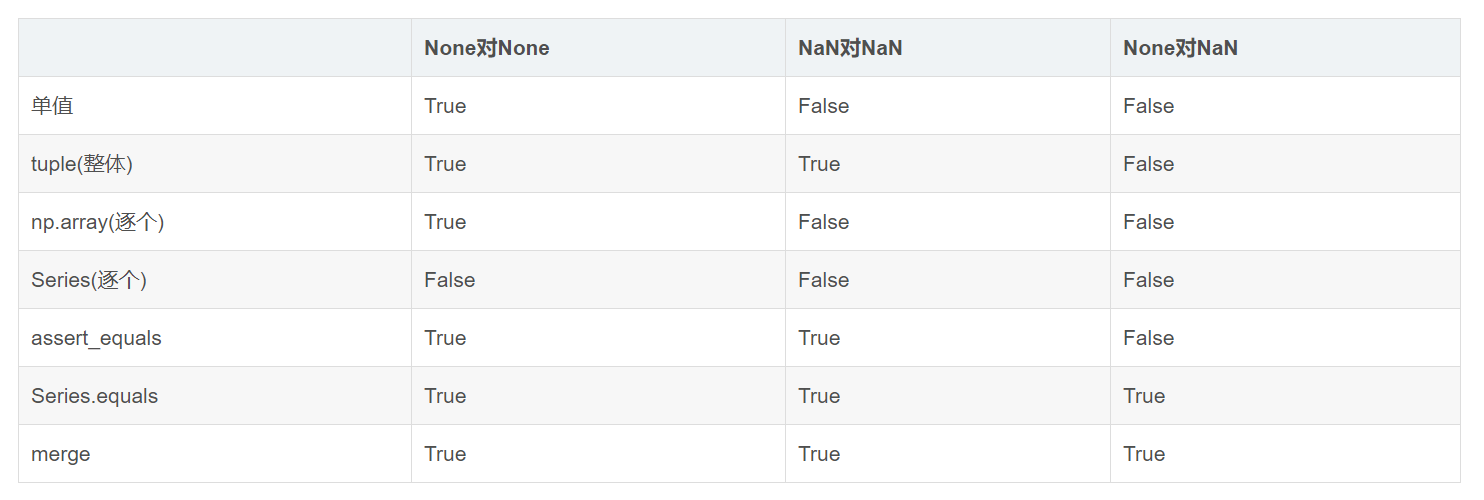
由于等值性比较方面，None和NaN在各场景下表现不太一致，相对来说None表现的更稳定。

为了不给自己惹不必要的麻烦和额外的记忆负担。 实践中，建议遵循以下三个原则即可

在用pandas和numpy处理数据阶段将None,NaN统一处理成NaN,以便支持更多的函数。
如果要判断Series,numpy.array整体的等值性，用专门的Series.equals,numpy.array函数去处理，不要自己用==判断 *　如果要将数据导入数据库，将NaN替换成None

【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

### 2.2 重复值观察与处理
由于这样那样的原因，数据中会不会存在重复值呢，如果存在要怎样处理呢

#### 2.2.1 任务一：请查看数据中的重复值

In [13]:
#写入代码

data_train.duplicated().sum()


0

#### 2.2.2 任务二：对重复值进行处理
(1)重复值有哪些处理方式呢？

(2)处理我们数据的重复值

方法多多益善

In [14]:
#重复值有哪些处理方式：

# duplicated()方法判断
# drop_duplicats()方法去重

'''
drop_duplicats参数说明：
  参数subset
    subset用来指定特定的列，默认所有列
  参数keep
    keep可以为first和last，表示是选择最前一项还是最后一项保留，默认first
  参数inplace
    inplace是直接在原来数据上修改还是保留一个副本，默认为False
'''

'\ndrop_duplicats参数说明：\n  参数subset\n    subset用来指定特定的列，默认所有列\n  参数keep\n    keep可以为first和last，表示是选择最前一项还是最后一项保留，默认first\n  参数inplace\n    inplace是直接在原来数据上修改还是保留一个副本，默认为False\n'

In [15]:
#写入代码

data_train.Name.duplicated().sum()


0

####  2.2.3 任务三：将前面清洗的数据保存为csv格式

In [16]:
#写入代码

data_train.to_csv('./newtrain.csv', index=False)


In [17]:
new = pd.read_csv('./newtrain.csv')
new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


### 2.3 特征观察与处理
我们对特征进行一下观察，可以把特征大概分为两大类：  
数值型特征：Survived ，Pclass， Age ，SibSp， Parch， Fare，其中Survived， Pclass为离散型数值特征，Age，SibSp， Parch， Fare为连续型数值特征  
文本型特征：Name， Sex， Cabin，Embarked， Ticket，其中Sex， Cabin， Embarked， Ticket为类别型文本特征，数值型特征一般可以直接用于模型的训练，但有时候为了模型的稳定性及鲁棒性会对连续变量进行离散化。文本型特征往往需要转换成数值型特征才能用于建模分析。

#### 2.3.1 任务一：对年龄进行分箱（离散化）处理
(1) 分箱操作是什么？

(2) 将连续变量Age平均分箱成5个年龄段，并分别用类别变量12345表示  

(3) 将连续变量Age划分为[0,5) [5,15) [15,30) [30,50) [50,80)五个年龄段，并分别用类别变量12345表示  

(4) 将连续变量Age按10% 30% 50 70% 90%五个年龄段，并用分类变量12345表示

(5) 将上面的获得的数据分别进行保存，保存为csv格式

### 分箱操作是什么：

数据分箱（Data binning，也称为离散组合或数据分桶）是一种数据预处理技术，将原始数据分成小区间，即一个 bin（小箱子），它是一种量子化的形式。

Pandas 实现连续数据的离散化处理主要基于两个函数：

pandas.cut 根据指定分界点对连续数据进行分箱处理

pandas.qcut 根据指定箱子的数量对连续数据进行等宽分箱处理

注：所谓等宽指的是每个箱子中的数据量是相同的。

pd.cut 可以指定区间将数字进行划分，以下三个值将数据划分成两个区间（及格或者不及格）：

pd.cut(df.Q1, bins=[0, 60, 100])

df.Q1.groupby(pd.cut(df.Q1, bins=[0, 60, 100])).count()

df.groupby(pd.cut(df.Q1, bins=[0, 60, 100])).count()

按区间做映射的例子：

df = pd.DataFrame({'A':[1, 3, 5, 7, 9]})

df.assign(B=pd.cut(df.A, [0,5,7, float('inf')], 
                   labels=['差','中','好'])
         )
'''

其他参数：

不用区间，使用数字做为标签（0，1，2，n）

pd.cut(df.Q1, bins=[0, 60, 100],labels=False)

指定标签名

pd.cut(df.Q1, bins=[0, 60, 100],labels=['不及格','及格',])

包含最低部分


pd.cut(df.Q1, bins=[0, 60, 100], include_lowest=True)

是否包含右边，闭区间，下例 [89, 100)

pd.cut(df.Q1, bins=[0, 89, 100], right=False)

pd.qcut 指定所分箱子的数量，pandas 会自动进行分箱：

pd.qcut(df.Q1,q=2)

应用到分组中：

df.Q1.groupby(pd.qcut(df.Q1,q=2)).count()

其他参数：

pd.qcut(range(5), 4)

pd.qcut(range(5), 4, labels=False)

指定标签名

pd.qcut(range(5), 3, labels=["good", "medium", "bad"])

返回箱子标签 array([ 1. , 51.5, 98. ]))

pd.qcut(df.Q1,q=2, retbins=True)

分箱位小数位数

pd.qcut(df.Q1,q=2,precision=3)

排名分3个层次

pd.qcut(df.Q1.rank(method='first'),3)


In [18]:
#写入代码  将连续变量Age平均分箱成5个年龄段，并分别用类别变量12345表示

data_train['Agecut'] = pd.cut(data_train.Age, 5, labels=['1', '2', '3', '4', '5'])
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agecut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,3


In [19]:
data_train.to_csv('./data_cut1.csv', index=False)

In [20]:
#写入代码  将连续变量Age划分为[0,5) [5,15) [15,30) [30,50) [50,80)五个年龄段，并分别用类别变量12345表示

data_train['Agecut'] = pd.cut(data_train['Age'], [0, 5, 15, 30, 50, 80], labels = ['1', '2', '3', '4', '5'])
data_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agecut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,4


In [21]:
data_train.to_csv('./data_cut2.csv', index=False)

In [22]:
#写入代码  将连续变量Age按10% 30% 50 70% 90%五个年龄段，并用分类变量12345表示

data_train['Agecut'] = pd.qcut(data_train['Age'], [0,0.1,0.3,0.5,0.7,0.9], labels = ['1','2','3','4','5'])
data_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agecut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,5


In [23]:
data_train.to_csv('./data_cut3.csv', index=False)

【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

#### 2.3.2 任务二：对文本变量进行转换
(1) 查看文本变量名及种类  
(2) 将文本变量Sex， Cabin ，Embarked用数值变量12345表示  
(3) 将文本变量Sex， Cabin， Embarked用one-hot编码表示

In [24]:
#写入代码

data_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
#写入代码

data_train.Cabin.unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [26]:
#写入代码

data_train.Embarked.value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [27]:
# 将文本变量Sex， Cabin ，Embarked用数值变量12345表示

data_train['Sexnum'] = data_train['Sex'].replace(['male', 'female'], ['1', '2'])
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agecut,Sexnum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,5,1


In [28]:
data_train['Embarkednum'] = data_train['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agecut,Sexnum,Embarkednum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,3,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,5,1,1


In [29]:
clist = data_train.Cabin.unique().tolist()
clist

['C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G63',
 

In [30]:
cnum = []
for i in range(len(clist)):
    cnum.append(i+1)
data_train['Cabinnum'] = data_train['Cabin'].replace(clist, cnum)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agecut,Sexnum,Embarkednum,Cabinnum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,2,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,3,2,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,2,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,5,1,1,3


In [31]:
# 将文本变量Sex， Cabin， Embarked用one-hot编码表示

a = pd.get_dummies(data_train.Sex)
a

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [32]:
da = pd.concat([data_train, a], axis=1)
da.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agecut,Sexnum,Embarkednum,Cabinnum,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,2,1,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,2,2,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,3,2,1,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,2,1,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,5,1,1,3,0,1


对独热编码不了解，搜索了结果，学习一部分，实际的操作还是需要深入了解学习，暂且搁置，往下学

#### 2.3.3 任务三：从纯文本Name特征里提取出Titles的特征(所谓的Titles就是Mr,Miss,Mrs等)

In [33]:
#写入代码

data_train['Namecall'] = data_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agecut,Sexnum,Embarkednum,Cabinnum,Namecall
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,2,1,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,2,2,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,3,2,1,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,2,1,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,5,1,1,3,Mr


In [34]:
data_train.loc[885:887]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agecut,Sexnum,Embarkednum,Cabinnum,Namecall
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,B42,Q,5,2,3,146,Mrs
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,B42,S,3,1,1,146,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S,2,2,1,146,Miss


In [35]:
#保存最终你完成的已经清理好的数据
data_train.to_csv('./data_clear.csv', index=False)

In [36]:
ff = pd.read_csv('./data_clear.csv')
ff

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agecut,Sexnum,Embarkednum,Cabinnum,Namecall
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,2.0,1,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5.0,2,2,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,3.0,2,1,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5.0,2,1,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,5.0,1,1,3,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S,3.0,1,1,146,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2.0,2,1,146,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C148,S,3.0,2,1,147,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.0,1,2,147,Mr
